In [2]:
import pandas as pd

# Прочитайте csv файл (використовуйте функцію read_csv)
file_path = 'D:/Project/draft/bestsellers with categories.csv'
df = pd.read_csv(file_path)


In [3]:
# Виведіть перші п'ять рядків (використовується функція head)
print(df.head())


                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [6]:
# Виведіть розміри датасету (використовуйте атрибут shape)
print(df.shape)



(550, 7)


In [7]:
# Відповідь: Про скільки книг зберігає дані датасет? 550

In [4]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']


In [9]:
import matplotlib.pyplot as plt

# Перевірте, чи у всіх рядків вистачає даних: 
# виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
print("Кількість пропусків по стовпцях:")
print(df.isna().sum())
# Відповідь: Чи є в якихось змінних пропуски? (Так / ні) Ні
    


Кількість пропусків по стовпцях:
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [10]:
# Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
unique_genres = df['genre'].unique()
print("\nУнікальні значення в колонці genre:")
print(unique_genres)
# Відповідь: Які є унікальні жанри? 'Non Fiction' 'Fiction'



Унікальні значення в колонці genre:
['Non Fiction' 'Fiction']


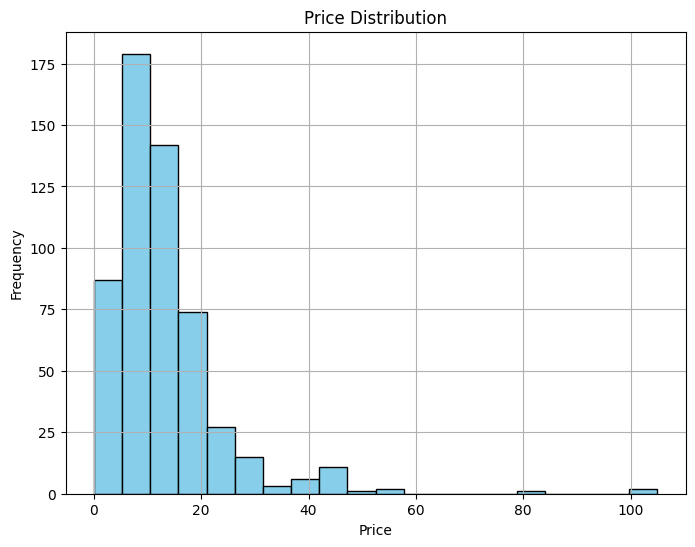

In [11]:
# Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

plt.figure(figsize=(8, 6))
df['price'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [12]:

# Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print("\nPrice statistics:")
print(f"Max price: {max_price}")
print(f"Min price: {min_price}")
print(f"Mean price: {mean_price}")
print(f"Median price: {median_price}")

# Відповідь: Максимальна ціна? 105
# Відповідь: Мінімальна ціна? 0
# Відповідь: Середня ціна? 13.1
# Відповідь: Медіанна ціна? 11


Price statistics:
Max price: 105
Min price: 0
Mean price: 13.1
Median price: 11.0


In [13]:
# Який рейтинг у датасеті найвищий? Відповідь: 4.9
highest_rating = (df['user_rating'].max())
print(highest_rating)


4.9


In [14]:
# Скільки книг мають такий рейтинг? Відповідь: 52
books_with_highest_rating = df[df['user_rating'] == highest_rating].shape[0]
print(books_with_highest_rating)


52


In [15]:
# Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing
book_with_most_reviews = df.loc[df['reviews'].idxmax()]['name']
print(book_with_most_reviews)


Where the Crawdads Sing


In [16]:
# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? 
# Відповідь: Publication Manual of the American Psychological Association, 6th Edition
top_50_2015 = df[df['year'] == 2015]
most_expensive_2015 = top_50_2015.loc[top_50_2015['price'].idxmax()]['name']
print(most_expensive_2015)


Publication Manual of the American Psychological Association, 6th Edition


In [42]:
# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? Відповідь: 20
fiction_books_2010 = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')].shape[0]
print(fiction_books_2010)


20


In [18]:
# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь: 1
books_4_9_rating_2010_2011 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))].shape[0]
print(books_4_9_rating_2010_2011)


1


In [22]:
# Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)
sorted_books_2015 = top_50_2015[top_50_2015['price'] < 8].sort_values(by='price')
last_book_sorted = sorted_books_2015.iloc[-1]['name']
print(last_book_sorted)


Old School (Diary of a Wimpy Kid #10)


In [25]:
# Максимальна ціна для жанру Fiction: Відповідь 82
# Мінімальна ціна для жанру Fiction: Відповідь 0
# Максимальна ціна для жанру Non Fiction: Відповідь 105
# Мінімальна ціна для жанру Non Fiction: Відповідь 0
price_stats_by_genre = df.groupby('genre').agg({'price': ['min', 'max']})

max_price_fiction = price_stats_by_genre.loc['Fiction', ('price', 'max')]
print(max_price_fiction)
min_price_fiction = price_stats_by_genre.loc['Fiction', ('price', 'min')]
print(min_price_fiction)
max_price_non_fiction = price_stats_by_genre.loc['Non Fiction', ('price', 'max')]
print(max_price_non_fiction)
min_price_non_fiction = price_stats_by_genre.loc['Non Fiction', ('price', 'min')]
print(min_price_non_fiction)


82
0
105
0


In [27]:
# Якої розмірності вийшла таблиця? Відповідь: (248,1)
# Який автор має найбільше книг? Відповідь: Jeff Kinney
# Скільки книг цього автора? Відповідь: 12
books_per_author = df.groupby('author').agg({'name': 'count'}).rename(columns={'name': 'count'})
table_shape = books_per_author.shape
print(table_shape)
author_with_most_books = books_per_author['count'].idxmax()
print(author_with_most_books)
most_books_count = books_per_author['count'].max()
print(most_books_count)


(248, 1)
Jeff Kinney
12


In [30]:
# У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
# Який у цього автора середній рейтинг? Відповідь: 3.9
average_rating_per_author = df.groupby('author').agg({'user_rating': 'mean'})
author_with_lowest_rating = average_rating_per_author['user_rating'].idxmin()
lowest_rating = average_rating_per_author['user_rating'].min()
print(author_with_lowest_rating)
print(lowest_rating)

Donna Tartt
3.9


In [36]:
# Який автор перший у списку? Muriel Barbery
combined_df = pd.concat([books_per_author, average_rating_per_author], axis=1)
sorted_combined_df = combined_df.sort_values(by=['count', 'user_rating'])
first_author_in_sorted_list = sorted_combined_df.iloc[0].name

(
    highest_rating,
    books_with_highest_rating,
    book_with_most_reviews,
    most_expensive_2015,
    fiction_books_2010,
    books_4_9_rating_2010_2011,
    last_book_sorted,
    max_price_fiction,
    min_price_fiction,
    max_price_non_fiction,
    min_price_non_fiction,
    table_shape,
    author_with_most_books,
    most_books_count,
    author_with_lowest_rating,
    lowest_rating,
    first_author_in_sorted_list
)
print(first_author_in_sorted_list)


Muriel Barbery


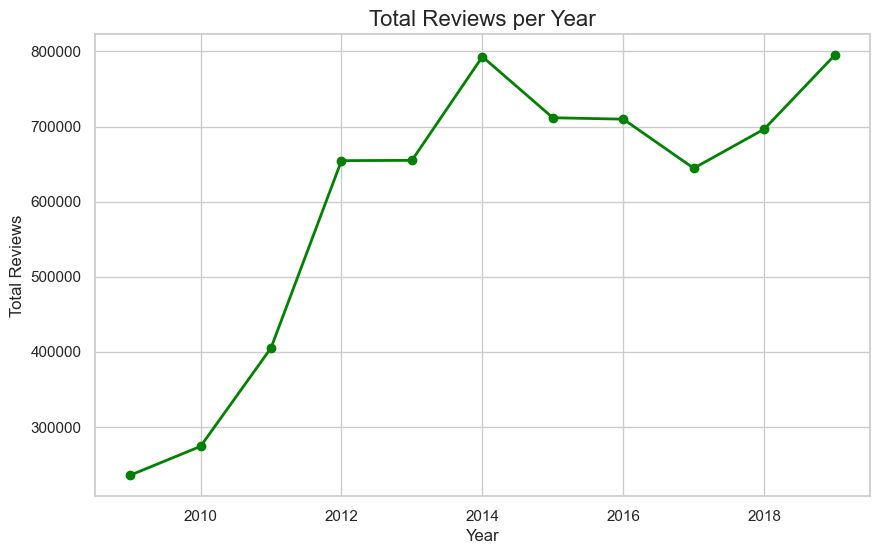

C:\Users\OSerg\AppData\Local\Temp\ipykernel_3956\2469317029.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='user_rating', data=df, palette='Set2')


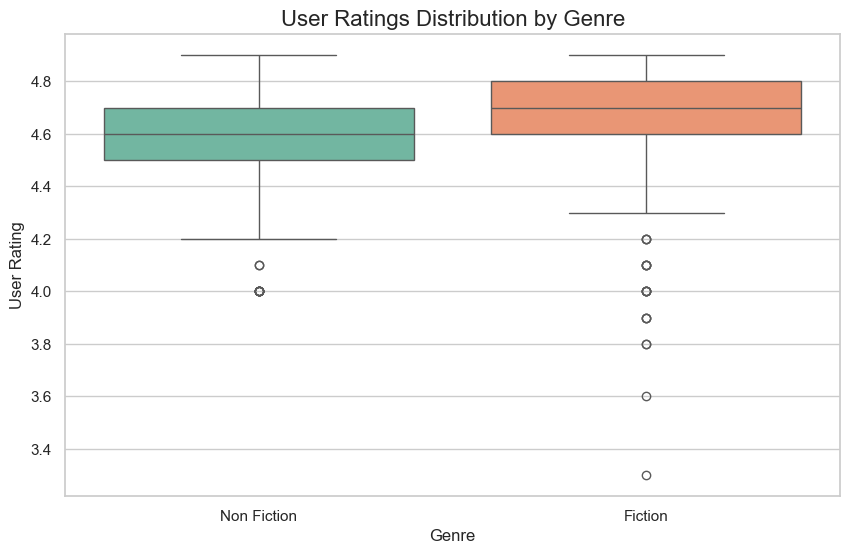

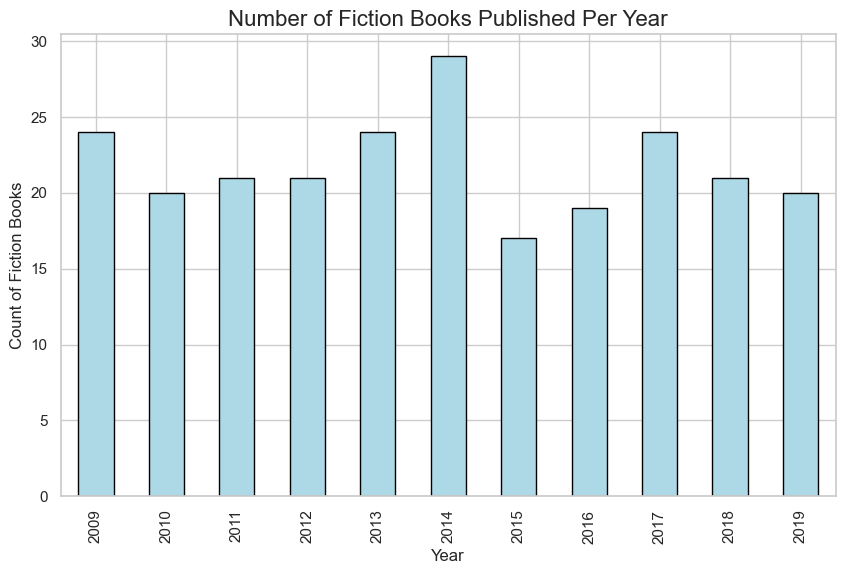

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

sns.set(style="whitegrid")

# 1. Line plot for Price over Years (using matplotlib)
plt.figure(figsize=(10, 6))
df.groupby('year')['reviews'].sum().plot(kind='line', marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Total Reviews per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Reviews', fontsize=12)
plt.grid(True)
plt.show()

# 2. Box plot for User Ratings per Genre (using seaborn)
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='user_rating', data=df, palette='Set2')
plt.title('User Ratings Distribution by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('User Rating', fontsize=12)
plt.show()

# 3. Bar plot for the number of books per Year (using matplotlib)
fiction_books = df[df['genre'] == 'Fiction']

# Plotting the bar graph for the number of Fiction books published per year
plt.figure(figsize=(10, 6))
fiction_books['year'].value_counts().sort_index().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Number of Fiction Books Published Per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Fiction Books', fontsize=12)
plt.grid(True, axis='y')
plt.show()